In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. Загрузка данных

In [3]:
df = pd.read_csv("la-crimes-sample.csv")

2. Сколько строк и столбцов в таблице?

In [4]:
print(f"2.\nrows: {len(df.index)}, cols: {len(df.columns)}")

2.
rows: 39608, cols: 27


3. Каковы названия столбцов? Какие типы данных у столбцов?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39608 entries, 0 to 39607
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              39608 non-null  int64  
 1   DR Number               39608 non-null  int64  
 2   Date Reported           39608 non-null  object 
 3   Date Occurred           39608 non-null  object 
 4   Time Occurred           39608 non-null  int64  
 5   Area ID                 39608 non-null  int64  
 6   Area Name               39608 non-null  object 
 7   Reporting District      39608 non-null  int64  
 8   Crime Code              39608 non-null  int64  
 9   Crime Code Description  39601 non-null  object 
 10  MO Codes                35317 non-null  object 
 11  Victim Age              36388 non-null  float64
 12  Victim Sex              35977 non-null  object 
 13  Victim Descent          35976 non-null  object 
 14  Premise Code            39605 non-null

4. Сколько в каждом из них уникальных значений?


In [6]:
df.nunique()

Unnamed: 0                39608
DR Number                 39608
Date Reported              2809
Date Occurred              2808
Time Occurred               900
Area ID                      21
Area Name                    21
Reporting District         1135
Crime Code                  115
Crime Code Description      113
MO Codes                  14019
Victim Age                   90
Victim Sex                    4
Victim Descent               17
Premise Code                189
Premise Description         170
Weapon Used Code             65
Weapon Description           65
Status Code                   6
Status Description            6
Crime Code 1                116
Crime Code 2                 67
Crime Code 3                  9
Crime Code 4                  2
Address                   19762
Cross Street               2064
Location                  19048
dtype: int64

5. Сколько пропущенных значений?

In [7]:
df.isna().sum()

Unnamed: 0                    0
DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        7
MO Codes                   4291
Victim Age                 3220
Victim Sex                 3631
Victim Descent             3632
Premise Code                  3
Premise Description          72
Weapon Used Code          26530
Weapon Description        26530
Status Code                   0
Status Description            0
Crime Code 1                  0
Crime Code 2              37125
Crime Code 3              39558
Crime Code 4              39606
Address                       0
Cross Street              32978
Location                      1
dtype: int64

6. Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

In [8]:
counts_female = (df["Victim Sex"] == "F").value_counts()
counts_male = (df["Victim Sex"] == "M").value_counts()

print(f"female victims: {counts_female[0]}\nmale victims: {counts_male[0]}")
if counts_female[0] > counts_male[0]:
    print("true")
else:
    print("false")

female victims: 22816
male victims: 21044
true


7. Определите 10 самых распространенных преступлений в Лос-Анджелесе.
Постройте график.


624    3581
510    3048
330    3038
310    2938
440    2866
354    2522
626    2147
740    2027
745    1759
230    1656
Name: Crime Code, dtype: int64


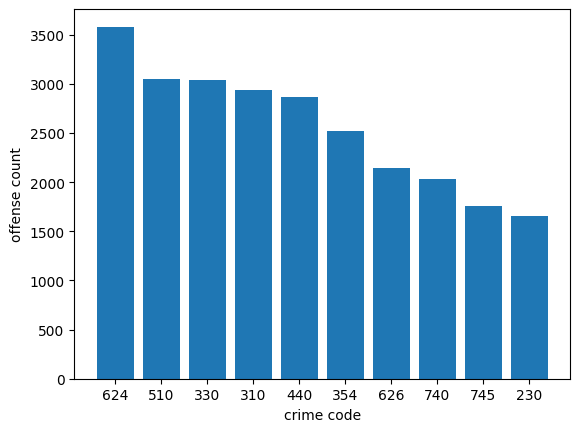

In [9]:
crimes = df["Crime Code"].value_counts()
print(crimes[:10])
plt.bar(list(map(str, crimes[:10].index)), crimes[:10].values)
plt.xlabel("crime code")
plt.ylabel("offense count")
plt.show()

8. От каких преступлений чаще страдают женщины, а от каких мужчины?

In [10]:
counts_female = df[df["Victim Sex"] == "F"]["Crime Code"].value_counts()
counts_male = df[df["Victim Sex"] == "M"]["Crime Code"].value_counts()
print("female: ", df[df["Crime Code"] == counts_female.index[0]]["Crime Code Description"].values[0])
print("male: ", df[df["Crime Code"] == counts_male.index[0]]["Crime Code Description"].values[0])

female:  BATTERY - SIMPLE ASSAULT
male:  BATTERY - SIMPLE ASSAULT


9. Люди какого происхождения чаще всего подвергаются преступлениям?


In [11]:
df["Victim Descent"].value_counts()[:3]

H    13488
W     9884
B     6449
Name: Victim Descent, dtype: int64

10. Отсортируйте районы, по количеству преступлений. Постройте график,
показывающий самые безопасный и опасный районы.


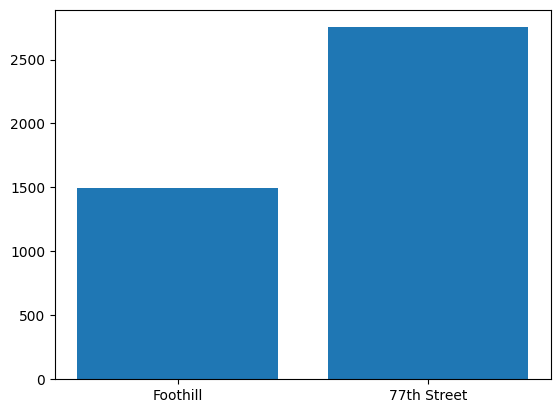

In [12]:
areas = df["Area Name"].value_counts()
safe_n, safe_v = areas.index[-1], areas.values[-1]
dang_n, dang_v = areas.index[0], areas.values[0]
plt.figure()
plt.bar([safe_n, dang_n], [safe_v, dang_v])
plt.show()